In [2]:
# from qiskit import *
from qiskit.primitives import Estimator

from qiskit.quantum_info.operators import SparsePauliOp
from qiskit.quantum_info.operators import Pauli
from qiskit.quantum_info import Operator
from qiskit_nature.second_q.hamiltonians import FermiHubbardModel
from qiskit_nature.second_q.hamiltonians.lattices.lattice import Lattice
from qiskit_nature.second_q.mappers import JordanWignerMapper
from qiskit_nature.second_q.mappers import ParityMapper
import rustworkx as rx

import numpy as np
from functools import *
import scipy.linalg as LA

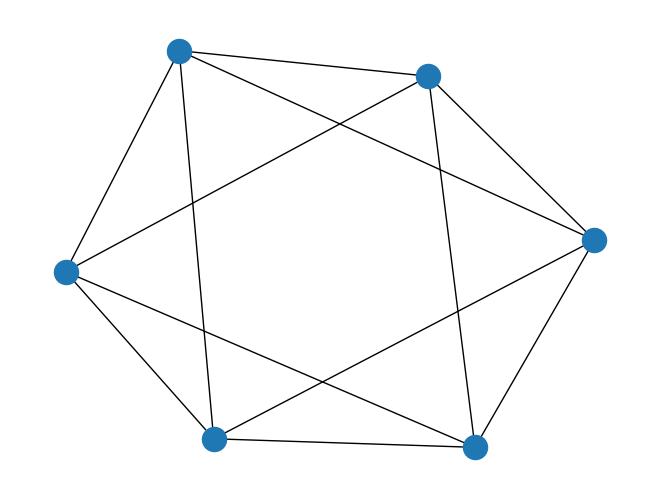

In [3]:
nodes = 6
edges = [(0,1,1),(0,2,1),(0,3,1),(0,4,1),
         (5,1,1),(5,2,1),(5,3,1),(5,4,1),
         (1,2,1),(2,3,1),(3,4,1),(4,1,1)]
# adjacency_matrix = np.array([
#     [0., 1., 1., 1., 1., 0.],
#     [1., 0., 1., 0., 1., 1.],
#     [1., 1., 0., 1., 0., 1.],
#     [1., 0., 1., 0., 1., 1.],
#     [1., 1., 0., 1., 0., 1.],
#     [0., 1., 1., 1., 1., 0.]])

octahedron = rx.PyGraph(multigraph=False)
octahedron.add_nodes_from(range(nodes))
octahedron.add_edges_from(edges)
lattice = Lattice(octahedron)
lattice = lattice.uniform_parameters(
    uniform_interaction=-1,uniform_onsite_potential=0)

fermi_hubb = FermiHubbardModel(lattice, onsite_interaction=1)
hamiltonian = JordanWignerMapper().map(fermi_hubb.second_q_op())
lattice.draw()

In [4]:
print("Dims in hamiltonian:", hamiltonian.dim)
print("hamiltonian hermitian?:", Operator(hamiltonian) == Operator(hamiltonian).adjoint())
# hamiltonian


Dims in hamiltonian: (4096, 4096)
hamiltonian hermitian?: True


In [5]:
H_matrix = hamiltonian.to_matrix()
eigs = LA.eigh(H_matrix)

In [6]:
eigenvals, eigenvectors = eigs


In [7]:
eigenvals

array([-7.84735408, -7.69523526, -7.69523526, ..., 11.36486336,
       11.36486336, 12.18284163], shape=(4096,))

In [8]:
# ground_state = sorted_eigens[0][1]

[(f"{a:f}, {i:012b}") for i,a in enumerate(eigenvectors[:, 0]) if abs(a) > 1e-2]
# sum([a**2 for i,a in enumerate(ground_state) if a >= 1e-2])
# ground_state_dict = {i:v for i, v in enumerate(eigenvectors[:, 0])}

# conjugate = np.array([ground_state_dict.get(2**4 - 1 - i, 0) for i in range(0, 2**4)])

# [(f"{np.real(a):f}, {i:04b}") for i,a in enumerate(conjugate) if a > 1e-15]

# swap_electron(edge, s, verticies) for edge in edges for s in spins])
# ((H_matrix @ conjugate) @ conjugate)/(conjugate @ conjugate)

['-0.152534+0.000000j, 000000000011',
 '0.168690+0.000000j, 000000000110',
 '-0.168690+0.000000j, 000000001001',
 '-0.152534+0.000000j, 000000001100',
 '0.168690+0.000000j, 000000010010',
 '0.168690+0.000000j, 000000011000',
 '-0.168690-0.000000j, 000000100001',
 '-0.168690+0.000000j, 000000100100',
 '-0.152534+0.000000j, 000000110000',
 '0.168690+0.000000j, 000001000010',
 '0.171972+0.000000j, 000001001000',
 '0.168690+0.000000j, 000001100000',
 '-0.168690+0.000000j, 000010000001',
 '-0.171972-0.000000j, 000010000100',
 '-0.168690+0.000000j, 000010010000',
 '-0.152534-0.000000j, 000011000000',
 '0.168690+0.000000j, 000100000010',
 '0.168690+0.000000j, 000100001000',
 '0.171972+0.000000j, 000100100000',
 '0.168690+0.000000j, 000110000000',
 '-0.168690-0.000000j, 001000000001',
 '-0.168690+0.000000j, 001000000100',
 '-0.171972-0.000000j, 001000010000',
 '-0.168690-0.000000j, 001001000000',
 '-0.152534+0.000000j, 001100000000',
 '0.171972+0.000000j, 010000000010',
 '0.168690+0.000000j, 0